# XYZ Ads Airing Report Analysis

## 1. Importing important libraries


In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns  # For Data Visualization 

import warnings   #Filtering out the warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",300)    #to display all the columns
pd.set_option("display.max_rows",300)   #to display all the rows

# 2. Loading the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# reading the XYZ_Ads_Airings_Data.xlsx file to dataframe using read_excel
ads_df = pd.read_excel('/content/drive/MyDrive/XYZ_Ads_Airings_Data.xlsx', skiprows=3)

In [4]:
# set the column headers as the values in the fourth row
ads_df.columns = ads_df.iloc[0]

# drop the fourth row, which is now redundant
ads_df = ads_df.drop(0)

# reset the row index
ads_df = ads_df.reset_index(drop=True)

## 3. Checking the structure of the data

In [5]:
# top 5 rows in dataset
ads_df.head(10)

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
0,1000001,Honda Cars,Honda Jazz,N-10079,cable,S-16736,01/10/2021,10:19:08 PM,1,PRIME TIME,30,1,178,2021,JAN,2,7,22,Northeast India
1,1000002,Maruti Suzuki,Maruti Suzuki Baleno,N-10096,cable,S-17450,01/16/2021,7:28:13 PM,3,WEEKEND,30,1,514,2021,JAN,3,6,19,Northeast India
2,1000003,Maruti Suzuki,Maruti Suzuki Ciaz,N-10044,cable,S-12299,01/05/2021,1:09:26 PM,2,DAYTIME,30,1,2313,2021,JAN,2,2,13,Northeast India
3,1000004,Maruti Suzuki,Maruti Suzuki Ciaz,N-10060,cable,S-14354,01/06/2021,8:55:49 AM,1,EARLY MORNING,30,1,308,2021,JAN,2,3,8,Northeast India
4,1000005,Hyundai Motors India,Hyundai I20,N-10123,cable,S-15146,01/02/2021,11:07:43 PM,2,LATE FRINGE,30,1,1885,2021,JAN,1,6,23,Northeast India
5,1000006,Hyundai Motors India,Hyundai I20,N-10116,cable,S-14314,01/15/2021,11:43:47 AM,2,DAYTIME,30,1,2683,2021,JAN,3,5,11,Northeast India
6,1000007,Maruti Suzuki,Maruti Suzuki Ciaz,N-10135,cable,S-15889,01/06/2021,7:12:36 PM,3,PRIME ACCESS,30,1,1545,2021,JAN,2,3,19,Northeast India
7,1000008,Hyundai Motors India,Hyundai I20,N-10003,cable,S-11802,01/14/2021,5:59:07 AM,6,EARLY MORNING,30,1,575,2021,JAN,3,4,5,Northeast India
8,1000009,Honda Cars,Honda Jazz,N-10121,cable,S-12232,01/08/2021,8:42:40 AM,9,EARLY MORNING,15,0.5,1383,2021,JAN,2,5,8,Northeast India
9,1000010,Toyota,Toyota Innova,N-10005,cable,S-20089,01/01/2021,7:16:41 AM,6,EARLY MORNING,15,0.5,49,2021,JAN,1,5,7,Northeast India


In [6]:
# no of rows and columns in applications
ads_df.shape

(731784, 19)

**Observations**: Our dataset has 731784 rows and 19 features

In [7]:
# Statistical summary of the dataset
ads_df.describe()

,Id,Brand,Product,Network,Network Type,Show,Date,Time,Pod Position,Dayparts,Duration,EQ Units,Spend ($),Broadcast Year,Broadcast Month,Broadcast Week,Day Of Week,Hour Of Day,TimeZone
count,731784,731784,731784,731784,731784,731784,731784,731784,731784,731784,731784,731784.0,731784,731784,731784,731784,731784,731784,731784
unique,731784,6,20,138,2,12659,365,85392,31,9,9,9.0,20674,2,12,52,7,24,4
top,1000001,Maruti Suzuki,Maruti Suzuki Baleno,N-10123,cable,S-19396,01/03/2021,7:14:10 PM,1,DAYTIME,30,1.0,10,2021,JAN,9,6,21,Northeast India
freq,1,280274,161393,15176,670071,9666,2991,32,159661,159017,574595,574595.0,2417,723141,84842,18209,107752,39407,707920


# 4. Checking for missing values if any

In [8]:
# percentage of missing data in each column
(ads_df.isna().sum()/len(ads_df)*100).sort_values(ascending=False)

0
Id                 0.0
Duration           0.0
Hour Of Day        0.0
Day Of Week        0.0
Broadcast Week     0.0
Broadcast Month    0.0
Broadcast Year     0.0
Spend ($)          0.0
EQ Units           0.0
Dayparts           0.0
Brand              0.0
Pod Position       0.0
Time               0.0
Date               0.0
Show               0.0
Network Type       0.0
Network            0.0
Product            0.0
TimeZone           0.0
dtype: float64

In [9]:
# checking the data types if there are any incorrect ones
ads_df.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731784 entries, 0 to 731783
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Id               731784 non-null  object
 1   Brand            731784 non-null  object
 2   Product          731784 non-null  object
 3   Network          731784 non-null  object
 4   Network Type     731784 non-null  object
 5   Show             731784 non-null  object
 6   Date             731784 non-null  object
 7   Time             731784 non-null  object
 8   Pod Position     731784 non-null  object
 9   Dayparts         731784 non-null  object
 10  Duration         731784 non-null  object
 11  EQ Units         731784 non-null  object
 12  Spend ($)        731784 non-null  object
 13  Broadcast Year   731784 non-null  object
 14  Broadcast Month  731784 non-null  object
 15  Broadcast Week   731784 non-null  object
 16  Day Of Week      731784 non-null  object
 17  Hour Of Da

# 5. Main Analysis: 

## 5.1 Question 1






In [10]:
# Grouping the data by Pod Position and calculating the total amount spent on ads
pod_position_expenditure = ads_df.groupby("Pod Position").sum()

print(pod_position_expenditure)

0                       Id                                              Brand  \
Pod Position                                                                    
1             219791426071  Honda CarsMaruti SuzukiMaruti SuzukiHyundai Mo...   
2             152990651803  Maruti SuzukiHyundai Motors IndiaHyundai Motor...   
3             138105734515  Maruti SuzukiMaruti SuzukiHonda CarsMaruti Suz...   
4             115124270536  Mahindra and MahindraHyundai Motors IndiaMarut...   
5              92113750920  Mahindra and MahindraMaruti SuzukiMahindra and...   
6              74922982851  Hyundai Motors IndiaToyotaToyotaMahindra and M...   
7              58800935594  Tata MotorsMahindra and MahindraHonda CarsHyun...   
8              45536311410  Hyundai Motors IndiaHyundai Motors IndiaMaruti...   
9              33136810433  Honda CarsMahindra and MahindraMahindra and Ma...   
10             22819056546  Tata MotorsMahindra and MahindraMahindra and M...   
11             15213046201  

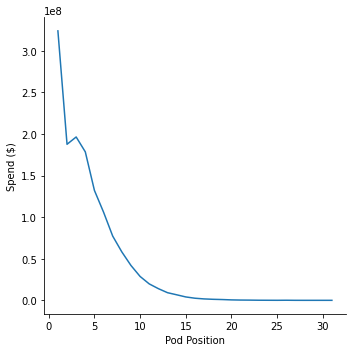

In [11]:
sns.relplot(data=pod_position_expenditure,x="Pod Position", y="Spend ($)",kind="line")

**Observations**:  
PoD Position: "Pod position" is the term used in the context of podcast advertising to describe the placement of an advertisement within an episode. With regard to the beginning of a segment, it explicitly refers to the ad's chronological location.

As far dependency of amount spent on POD Position is concerned, it does depends on it on a great extent. In the above plot we can see that after grouped sum of the amount spent on ads based on their POD Position, the lesser the POD Position number is, the higher is the expenditure.

## 5.2 Question 2

In [12]:
# total number of ads throughout the year
len(ads_df["Id"].unique())

731784

In [13]:
#converting date column to datetime and subtract one week
ads_df['Date'] = pd.to_datetime(ads_df['Date'])

brand_qrtr_share = ads_df.groupby(['Brand', ads_df['Date'].dt.to_period(' Q')])['Id'].count()*100/731784
print(brand_qrtr_share)

Brand                  Date  
Honda Cars             2021Q1     3.543259
                       2021Q2     2.649416
                       2021Q3     3.145737
                       2021Q4     2.313251
Hyundai Motors India   2021Q1     3.060466
                       2021Q2     2.544877
                       2021Q3     2.252577
                       2021Q4     1.884846
Mahindra and Mahindra  2021Q1     5.926749
                       2021Q2     6.319351
                       2021Q3     5.402824
                       2021Q4     2.560592
Maruti Suzuki          2021Q1    11.257557
                       2021Q2     9.797290
                       2021Q3     9.045839
                       2021Q4     8.199414
Tata Motors            2021Q1     2.825834
                       2021Q2     2.045276
                       2021Q3     2.037760
                       2021Q4     4.165573
Toyota                 2021Q1     2.488713
                       2021Q2     3.017694
                       2

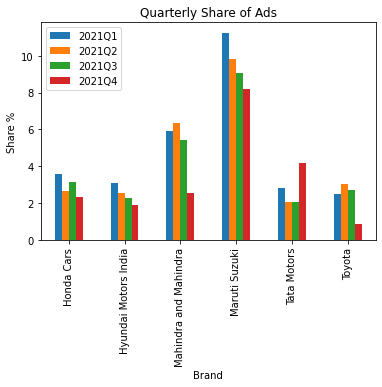

In [14]:
# Building a bar plot for our above dataset to ease our observations

brand_qrtr_share.unstack().plot.bar()
plt.title("Quarterly Share of Ads")
plt.ylabel("Share %")
plt.legend(loc="upper left")

**Observations :** 

1.   Maruti Suzuki has the highest share amongst all brands in all quarters followed by Mahindra nad Mahindra.
2.   Out of 6 brands, 3 have decreasing trend from Q1 to Q4 in the share of TV airings.

1.   All the brands focus more on TV airings in Q1 or Q2 and least by Q4, while Tata Motors focus most in Q4 followed by Q1






## 5.3 Question 3


Here we will do our analysis on various features brands on different features


### 5.3.1 Brands vs share in all 4 quarters


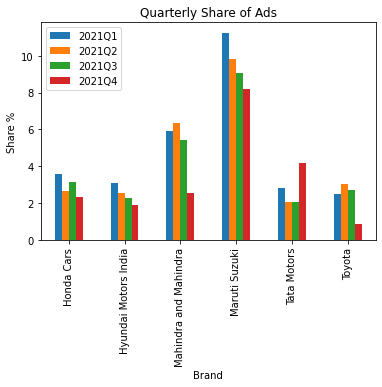

In [15]:
#converting date column to datetime and subtract one week
ads_df['Date'] = pd.to_datetime(ads_df['Date'])

brand_qrtr_share = ads_df.groupby(['Brand', ads_df['Date'].dt.to_period(' Q')])['Id'].count()*100/731784

# Building a bar plot for our above dataset to ease our observations

brand_qrtr_share.unstack().plot.bar()
plt.title("Quarterly Share of Ads")
plt.ylabel("Share %")
plt.legend(loc="upper left")

**Observations :** 


1.   From the chart, we can see that Maruti Suzuki has consistently had the highest share of ads throughout the entire period, followed by Mahindra and Mahindra, Honda Cars, and Hyundai Motors India.
2.   Best Advertising strategy for Toyota and Tata Motors would be they should focus more on increasing their share of advertisment in 2022 and achieve the share of atleast 50% of whoever becomes the highest sharer in the year.



### 5.3.2 Brands vs Spend in different dayparts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'DAYTIME'),
  Text(1, 0, 'EARLY FRINGE'),
  Text(2, 0, 'EARLY MORNING'),
  Text(3, 0, 'EVENING NEWS'),
  Text(4, 0, 'LATE FRINGE'),
  Text(5, 0, 'OVERNIGHT'),
  Text(6, 0, 'PRIME ACCESS'),
  Text(7, 0, 'PRIME TIME'),
  Text(8, 0, 'WEEKEND')])

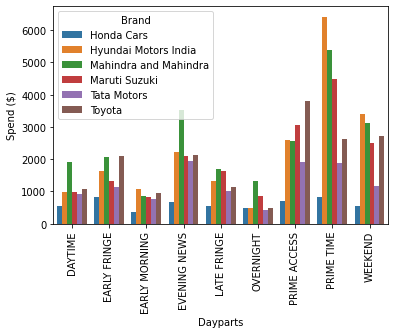

In [16]:
# Creating a new dataframe by grouping Brands and Dayparts, and taking mean of each group
ads_df_dayparts = ads_df.groupby(['Brand','Dayparts']).mean().reset_index()

# visualiing the new dataframe with Spend ($) feature
sns.barplot(data=ads_df_dayparts, x='Dayparts', y='Spend ($)', hue='Brand')
plt.xticks(rotation=90)


**Observations :**

1.   Here it seems that the almost all the brands are spending maximum in the PRIME TIME daypart except for Tata Motors who spends approximately equial in PRIME TIME, PRIME ACCESS and EVENING NEWS.
2.   Here Hyundai Motors India turns out to be a little smarter than other brands as it focused on spending more than other Brands in the PRIME TIME and WEEKEND where all the Brands are spending their max because of maximum reach of ads in these times

1.   Honda Cars' spending doesn't seems to be varying at all by the different dayparts, which has hampered its overall share in ads throughout the quarters.
2.   Mahindra and Mahindra's spending trend seems somewhat like Hyundai Motors India.






### 5.3.3 Brands vs Spend according to various POD Positions

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

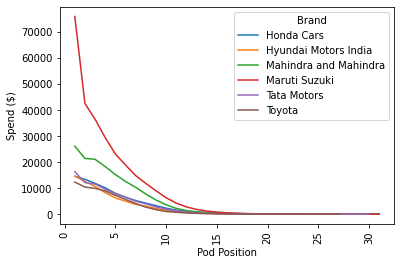

In [17]:
# Creating a new dataframe by grouping Brands and Pod Positions, and taking count of each occurences according to unique Pod Position and Brand
ads_df_pod = ads_df.groupby(['Pod Position','Brand']).count().reset_index()

# visualiing the new dataframe with Spend ($) feature
sns.lineplot(data = ads_df_pod, x='Pod Position', y='Spend ($)',hue='Brand')
plt.xticks(rotation=90)

**Observations :**

1.   Here the picture seems to be somewhat same as that of Brand vs Spend, so the observations will also be same.


2.   More than 70,000 ads were aired in Pod position 1 of Maruti Suzuki




## 5.3.4 Question 4

<AxesSubplot:xlabel='TimeZone', ylabel='Id'>

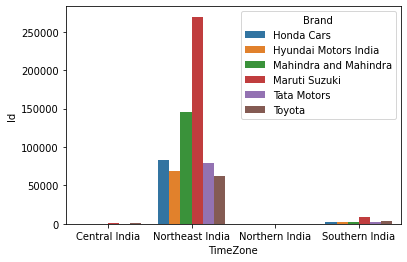

In [18]:
ads_df_m = ads_df.groupby(["Brand","TimeZone"]).count().reset_index()
sns.barplot(data=ads_df_m,x="TimeZone",y="Id",hue="Brand")

### Suggestions to CMO:

1.   As per the chart in 5.3.3, Mahindra and Mahindra need to increase its spending in PRIME ACESS daypart, this can be done by cutting the expenditure in EVE NEWS and with this they can target the working population to max
2.   Mahindra and Mahindra if they want to be ahead of other brands they need to show their presense in all 4 zones of India, they can start from Northern India.

1.   POD Position 1 should be targetted by Mahindra and Mahindra, to catch the attention of the viewers to the most.
2.   Lastly, the share of ads in all 4 quarters needs to be patternized with certain decrease in every coming quarter.
